# Deep Learning I
Actividad Lección 13 || Programación Python para Machine Learning

Objetivos:
* Saber qué es el Deep Learning y en qué situaciones puede ser útil.
* Identificar los requisitos software y hardware para desarrollar proyectos de Deep Learning.
* Conocer los distintos modelos de Deep Learning existentes.
* Dominar las técnicas de implementación de modelos de Deep Learning en Python.

Datos del alumno:
* Víctor Luque Martín
* Máster Avanzado en Programación en Python para Hacking, BigData y Machine Learning

Fecha: 17/01/2023

# Tabla de Contenidos
1. [Importes](#importes)
2. [Instalaciones](#instalaciones)
3. [Carga de datos](#carga-de-datos)
4. [Red Neuronal Profunda](#dnn)
5. [Conclusión](#conclusion)

# Importes <a class="anchor" id="importes"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random, time
from matplotlib import ticker
from sklearn.preprocessing import StandardScaler

# Instalaciones <a class="anchor" id="instalaciones"></a>
Actualmente, desde la versión 2.0.0 de TensorFlow incluye Keras como API de alto nivel para la construcción de modelos de Deep Learning. Por tanto, no es necesario instalar Keras por separado.

In [ ]:
#!pip install tensorflow
#!pip install keras

In [2]:
import tensorflow as tf
import keras #from tensorflow import keras

print(f"Versión Tensorflow: {tf.__version__}")
print(f"Versión Keras: {keras.__version__}")
print("Num GPUs Disponibles: ", len(tf.config.list_physical_devices('GPU')))

Versión Tensorflow: 2.11.0
Versión Keras: 2.11.0
Num GPUs Disponibles:  0


Al no disponer de GPUs, no es posible utilizar Tensorflow con GPUs

# Carga de datos <a class="anchor" id="carga-de-datos"></a>
Se cargarán los datos del dataset MNIST ([“Optical Recognition of Handwritten Digits"](https://archive.ics.uci.edu/ml/datasets/optical+recognition+of+handwritten+digits)) para trabajar con un modelo de Red Neuronal Profunda.

In [3]:
col_names = [f"pixel{i}" for i in range(1, 65)] + ["class"]

In [4]:
mnist_train = pd.read_csv("optdigits.tra", header=None, names=col_names)
mnist_test = pd.read_csv("optdigits.tes", header=None, names=col_names)

In [5]:
mnist_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,class
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [6]:
mnist_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,class
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


Realizamos la division de los dataset en variables independientes (X) y dependientes (y) y realizamos un escalado de datos sobre las X

In [7]:
# División X_train, y_train, X_test, y_test
X_train = mnist_train.drop(columns=['class'])
X_test = mnist_test.drop(columns=['class'])
y_train = mnist_train["class"]
y_test = mnist_test["class"]

# Normalización
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Red Neuronal Profunda <a class="anchor" id="dnn"></a>
Una red neuronal profunda son modelos que cuentan con múltiples capas ocultas ($\text{capas ocultas} \geq 2$) entre las capas de entrada y la de salida, que permiten resolver problemas que el Machine Learning Clásico no es capaz de alcanzar.

A continuación, se implementará una red neuronal profunda con Keras y TensorFlow para resolver el problema de clasificación multiclase del dataset MNIST

In [8]:
from keras import layers
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy

seed = random.seed(time.time())
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dropout(.3, seed=seed),
    layers.Dense(32, activation='swish'),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='swish'),
    layers.Dropout(.2, seed=seed),
    layers.Dense(128, activation='relu'),
    layers.Dropout(.2, seed=seed),
    layers.Dense(64, activation='swish'),
    layers.Dropout(.1, seed=seed),
    layers.Dense(16, activation='swish'),
    layers.Dense(10)
])

optimizer = Adam(learning_rate=0.0001)
loss = SparseCategoricalCrossentropy()

model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                1040      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 128)               8

Una vez definida la neurona, se debe realizar un entrenamiento de la misma, donde se irá perfeccionando el modelo mediante un número de épocas.

In [9]:
history = model.fit(X_train, y_train, epochs=1000, validation_split=0.2)
model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch
model_history

Epoch 1/1000
96/96 [==============================] - 1s 4ms/step - loss: 7.6325 - accuracy: 0.1177 - val_loss: 5.5620 - val_accuracy: 0.1908
Epoch 2/1000
96/96 [==============================] - 0s 2ms/step - loss: 5.8615 - accuracy: 0.1426 - val_loss: 3.9290 - val_accuracy: 0.2235
Epoch 3/1000
96/96 [==============================] - 0s 2ms/step - loss: 5.0262 - accuracy: 0.1629 - val_loss: 3.0786 - val_accuracy: 0.2261
Epoch 4/1000
96/96 [==============================] - 0s 2ms/step - loss: 4.5699 - accuracy: 0.1661 - val_loss: 2.6817 - val_accuracy: 0.2458
Epoch 5/1000
96/96 [==============================] - 0s 2ms/step - loss: 3.9974 - accuracy: 0.1815 - val_loss: 2.5590 - val_accuracy: 0.2418
Epoch 6/1000
96/96 [==============================] - 0s 2ms/step - loss: 3.8118 - accuracy: 0.1857 - val_loss: 2.3756 - val_accuracy: 0.2706
Epoch 7/1000
96/96 [==============================] - 0s 2ms/step - loss: 3.3981 - accuracy: 0.1939 - val_loss: 2.2789 - val_accuracy: 0.2928
Epoch 

96/96 [==============================] - 0s 3ms/step - loss: 1.9062 - accuracy: 0.4156 - val_loss: 1.5672 - val_accuracy: 0.5843
Epoch 59/1000
96/96 [==============================] - 0s 3ms/step - loss: 1.8237 - accuracy: 0.4137 - val_loss: 1.5827 - val_accuracy: 0.5895
Epoch 60/1000
96/96 [==============================] - 0s 4ms/step - loss: 1.7951 - accuracy: 0.4251 - val_loss: 1.5843 - val_accuracy: 0.6013
Epoch 61/1000
96/96 [==============================] - 0s 4ms/step - loss: 1.8072 - accuracy: 0.4379 - val_loss: 1.5707 - val_accuracy: 0.5974
Epoch 62/1000
96/96 [==============================] - 0s 3ms/step - loss: 1.7993 - accuracy: 0.4487 - val_loss: 1.5597 - val_accuracy: 0.6013
Epoch 63/1000
96/96 [==============================] - 0s 3ms/step - loss: 1.7755 - accuracy: 0.4454 - val_loss: 1.5306 - val_accuracy: 0.6039
Epoch 64/1000
96/96 [==============================] - 0s 4ms/step - loss: 1.8332 - accuracy: 0.4493 - val_loss: 1.5037 - val_accuracy: 0.6118
Epoch 65/1000

96/96 [==============================] - 0s 2ms/step - loss: 1.4912 - accuracy: 0.5713 - val_loss: 1.2149 - val_accuracy: 0.6850
Epoch 116/1000
96/96 [==============================] - 0s 2ms/step - loss: 1.5253 - accuracy: 0.5827 - val_loss: 1.2130 - val_accuracy: 0.7098
Epoch 117/1000
96/96 [==============================] - 0s 2ms/step - loss: 1.4719 - accuracy: 0.5746 - val_loss: 1.2073 - val_accuracy: 0.7163
Epoch 118/1000
96/96 [==============================] - 0s 2ms/step - loss: 1.4865 - accuracy: 0.5697 - val_loss: 1.2001 - val_accuracy: 0.7190
Epoch 119/1000
96/96 [==============================] - 0s 2ms/step - loss: 1.4978 - accuracy: 0.5746 - val_loss: 1.2029 - val_accuracy: 0.7098
Epoch 120/1000
96/96 [==============================] - 0s 2ms/step - loss: 1.4958 - accuracy: 0.5634 - val_loss: 1.1986 - val_accuracy: 0.7124
Epoch 121/1000
96/96 [==============================] - 0s 2ms/step - loss: 1.4765 - accuracy: 0.5952 - val_loss: 1.2004 - val_accuracy: 0.7150
Epoch 1

Epoch 172/1000
96/96 [==============================] - 0s 2ms/step - loss: 1.3261 - accuracy: 0.6171 - val_loss: 1.0197 - val_accuracy: 0.7686
Epoch 173/1000
96/96 [==============================] - 0s 2ms/step - loss: 1.3337 - accuracy: 0.6187 - val_loss: 1.0041 - val_accuracy: 0.7725
Epoch 174/1000
96/96 [==============================] - 0s 2ms/step - loss: 1.3213 - accuracy: 0.6328 - val_loss: 0.9786 - val_accuracy: 0.7647
Epoch 175/1000
96/96 [==============================] - 0s 2ms/step - loss: 1.3022 - accuracy: 0.6246 - val_loss: 0.9669 - val_accuracy: 0.7712
Epoch 176/1000
96/96 [==============================] - 0s 2ms/step - loss: 1.3107 - accuracy: 0.6308 - val_loss: 0.9525 - val_accuracy: 0.7725
Epoch 177/1000
96/96 [==============================] - 0s 2ms/step - loss: 1.3134 - accuracy: 0.6380 - val_loss: 0.9418 - val_accuracy: 0.7765
Epoch 178/1000
96/96 [==============================] - 0s 2ms/step - loss: 1.3139 - accuracy: 0.6328 - val_loss: 0.9380 - val_accuracy:

Epoch 229/1000
96/96 [==============================] - 0s 2ms/step - loss: 1.1251 - accuracy: 0.6998 - val_loss: 0.6578 - val_accuracy: 0.8719
Epoch 230/1000
96/96 [==============================] - 0s 2ms/step - loss: 1.1463 - accuracy: 0.6923 - val_loss: 0.6748 - val_accuracy: 0.8523
Epoch 231/1000
96/96 [==============================] - 0s 2ms/step - loss: 1.1185 - accuracy: 0.6969 - val_loss: 0.7001 - val_accuracy: 0.8510
Epoch 232/1000
96/96 [==============================] - 0s 2ms/step - loss: 1.1027 - accuracy: 0.6893 - val_loss: 0.6958 - val_accuracy: 0.8706
Epoch 233/1000
96/96 [==============================] - 0s 2ms/step - loss: 1.0842 - accuracy: 0.6910 - val_loss: 0.6790 - val_accuracy: 0.8706
Epoch 234/1000
96/96 [==============================] - 0s 2ms/step - loss: 1.1225 - accuracy: 0.6942 - val_loss: 0.6597 - val_accuracy: 0.8654
Epoch 235/1000
96/96 [==============================] - 0s 2ms/step - loss: 1.1589 - accuracy: 0.6933 - val_loss: 0.6600 - val_accuracy:

Epoch 286/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.9633 - accuracy: 0.7410 - val_loss: 0.5765 - val_accuracy: 0.8876
Epoch 287/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.9511 - accuracy: 0.7322 - val_loss: 0.5640 - val_accuracy: 0.9033
Epoch 288/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.9105 - accuracy: 0.7538 - val_loss: 0.5534 - val_accuracy: 0.9124
Epoch 289/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.9450 - accuracy: 0.7505 - val_loss: 0.5395 - val_accuracy: 0.9124
Epoch 290/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.9995 - accuracy: 0.7269 - val_loss: 0.5391 - val_accuracy: 0.9176
Epoch 291/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.9693 - accuracy: 0.7456 - val_loss: 0.5358 - val_accuracy: 0.9203
Epoch 292/1000
96/96 [==============================] - 0s 2ms/step - loss: 1.0152 - accuracy: 0.7400 - val_loss: 0.5391 - val_accuracy:

Epoch 343/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.8516 - accuracy: 0.7619 - val_loss: 0.4879 - val_accuracy: 0.9281
Epoch 344/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.8902 - accuracy: 0.7734 - val_loss: 0.4887 - val_accuracy: 0.9294
Epoch 345/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.8552 - accuracy: 0.7750 - val_loss: 0.4866 - val_accuracy: 0.9294
Epoch 346/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.8436 - accuracy: 0.7691 - val_loss: 0.4811 - val_accuracy: 0.9294
Epoch 347/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.8863 - accuracy: 0.7708 - val_loss: 0.4895 - val_accuracy: 0.9281
Epoch 348/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.8340 - accuracy: 0.7711 - val_loss: 0.4896 - val_accuracy: 0.9307
Epoch 349/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.8610 - accuracy: 0.7802 - val_loss: 0.4841 - val_accuracy:

Epoch 400/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.8003 - accuracy: 0.8028 - val_loss: 0.4246 - val_accuracy: 0.9307
Epoch 401/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.8692 - accuracy: 0.7894 - val_loss: 0.4600 - val_accuracy: 0.9333
Epoch 402/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.7797 - accuracy: 0.7950 - val_loss: 0.4615 - val_accuracy: 0.9294
Epoch 403/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.7903 - accuracy: 0.8015 - val_loss: 0.4483 - val_accuracy: 0.9320
Epoch 404/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.8406 - accuracy: 0.7806 - val_loss: 0.4335 - val_accuracy: 0.9359
Epoch 405/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.8597 - accuracy: 0.7871 - val_loss: 0.4261 - val_accuracy: 0.9386
Epoch 406/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.7693 - accuracy: 0.8002 - val_loss: 0.4232 - val_accuracy:

Epoch 457/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.7745 - accuracy: 0.8113 - val_loss: 0.3600 - val_accuracy: 0.9373
Epoch 458/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.7737 - accuracy: 0.7969 - val_loss: 0.3692 - val_accuracy: 0.9386
Epoch 459/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.7077 - accuracy: 0.8169 - val_loss: 0.3868 - val_accuracy: 0.9373
Epoch 460/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.7435 - accuracy: 0.8244 - val_loss: 0.3846 - val_accuracy: 0.9346
Epoch 461/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.7183 - accuracy: 0.8182 - val_loss: 0.3837 - val_accuracy: 0.9320
Epoch 462/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.7558 - accuracy: 0.8015 - val_loss: 0.3734 - val_accuracy: 0.9346
Epoch 463/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.8275 - accuracy: 0.8152 - val_loss: 0.3678 - val_accuracy:

Epoch 514/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.7221 - accuracy: 0.8280 - val_loss: 0.4034 - val_accuracy: 0.9307
Epoch 515/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.7126 - accuracy: 0.8159 - val_loss: 0.3793 - val_accuracy: 0.9346
Epoch 516/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.6548 - accuracy: 0.8270 - val_loss: 0.3708 - val_accuracy: 0.9373
Epoch 517/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.8172 - val_loss: 0.3667 - val_accuracy: 0.9359
Epoch 518/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.7743 - accuracy: 0.8162 - val_loss: 0.3722 - val_accuracy: 0.9373
Epoch 519/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.7234 - accuracy: 0.8165 - val_loss: 0.3682 - val_accuracy: 0.9359
Epoch 520/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.7320 - accuracy: 0.8201 - val_loss: 0.3649 - val_accuracy:

Epoch 571/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.6985 - accuracy: 0.8273 - val_loss: 0.3435 - val_accuracy: 0.9386
Epoch 572/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.7264 - accuracy: 0.8195 - val_loss: 0.3460 - val_accuracy: 0.9399
Epoch 573/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.6377 - accuracy: 0.8257 - val_loss: 0.3485 - val_accuracy: 0.9412
Epoch 574/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.6418 - accuracy: 0.8300 - val_loss: 0.3539 - val_accuracy: 0.9425
Epoch 575/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.6398 - accuracy: 0.8349 - val_loss: 0.3525 - val_accuracy: 0.9346
Epoch 576/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.8273 - val_loss: 0.3483 - val_accuracy: 0.9373
Epoch 577/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.7157 - accuracy: 0.8211 - val_loss: 0.3619 - val_accuracy:

Epoch 628/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.8427 - val_loss: 0.3214 - val_accuracy: 0.9412
Epoch 629/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.7155 - accuracy: 0.8339 - val_loss: 0.3327 - val_accuracy: 0.9399
Epoch 630/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.6483 - accuracy: 0.8401 - val_loss: 0.3257 - val_accuracy: 0.9425
Epoch 631/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.6206 - accuracy: 0.8381 - val_loss: 0.3302 - val_accuracy: 0.9451
Epoch 632/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.7067 - accuracy: 0.8391 - val_loss: 0.3294 - val_accuracy: 0.9412
Epoch 633/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.8381 - val_loss: 0.3151 - val_accuracy: 0.9451
Epoch 634/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.6242 - accuracy: 0.8466 - val_loss: 0.3337 - val_accuracy:

Epoch 685/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.6119 - accuracy: 0.8594 - val_loss: 0.3279 - val_accuracy: 0.9451
Epoch 686/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.6537 - accuracy: 0.8574 - val_loss: 0.3413 - val_accuracy: 0.9386
Epoch 687/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.6102 - accuracy: 0.8476 - val_loss: 0.3365 - val_accuracy: 0.9425
Epoch 688/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.6523 - accuracy: 0.8430 - val_loss: 0.3279 - val_accuracy: 0.9438
Epoch 689/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.6021 - accuracy: 0.8479 - val_loss: 0.3358 - val_accuracy: 0.9425
Epoch 690/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.6123 - accuracy: 0.8545 - val_loss: 0.3318 - val_accuracy: 0.9438
Epoch 691/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.6037 - accuracy: 0.8627 - val_loss: 0.3284 - val_accuracy:

Epoch 742/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.5783 - accuracy: 0.8630 - val_loss: 0.3036 - val_accuracy: 0.9569
Epoch 743/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.6222 - accuracy: 0.8512 - val_loss: 0.2930 - val_accuracy: 0.9595
Epoch 744/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.6075 - accuracy: 0.8551 - val_loss: 0.3076 - val_accuracy: 0.9529
Epoch 745/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.5904 - accuracy: 0.8538 - val_loss: 0.2961 - val_accuracy: 0.9542
Epoch 746/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.8610 - val_loss: 0.3163 - val_accuracy: 0.9529
Epoch 747/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.5535 - accuracy: 0.8555 - val_loss: 0.2976 - val_accuracy: 0.9529
Epoch 748/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.8440 - val_loss: 0.3239 - val_accuracy:

Epoch 799/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.5495 - accuracy: 0.8672 - val_loss: 0.3140 - val_accuracy: 0.9516
Epoch 800/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.5923 - accuracy: 0.8574 - val_loss: 0.3230 - val_accuracy: 0.9529
Epoch 801/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.5546 - accuracy: 0.8685 - val_loss: 0.3197 - val_accuracy: 0.9516
Epoch 802/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.6072 - accuracy: 0.8571 - val_loss: 0.3304 - val_accuracy: 0.9529
Epoch 803/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.5852 - accuracy: 0.8584 - val_loss: 0.3108 - val_accuracy: 0.9529
Epoch 804/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.5177 - accuracy: 0.8486 - val_loss: 0.3175 - val_accuracy: 0.9516
Epoch 805/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.5482 - accuracy: 0.8640 - val_loss: 0.3139 - val_accuracy:

Epoch 856/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.5885 - accuracy: 0.8731 - val_loss: 0.3094 - val_accuracy: 0.9438
Epoch 857/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.5383 - accuracy: 0.8702 - val_loss: 0.3156 - val_accuracy: 0.9477
Epoch 858/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.5739 - accuracy: 0.8617 - val_loss: 0.2972 - val_accuracy: 0.9490
Epoch 859/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.5391 - accuracy: 0.8780 - val_loss: 0.2972 - val_accuracy: 0.9503
Epoch 860/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.5403 - accuracy: 0.8591 - val_loss: 0.3050 - val_accuracy: 0.9516
Epoch 861/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.5488 - accuracy: 0.8659 - val_loss: 0.3033 - val_accuracy: 0.9516
Epoch 862/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.5027 - accuracy: 0.8731 - val_loss: 0.2992 - val_accuracy:

Epoch 913/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.5340 - accuracy: 0.8751 - val_loss: 0.2918 - val_accuracy: 0.9529
Epoch 914/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.5330 - accuracy: 0.8708 - val_loss: 0.2879 - val_accuracy: 0.9542
Epoch 915/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.4575 - accuracy: 0.8869 - val_loss: 0.3070 - val_accuracy: 0.9490
Epoch 916/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.5185 - accuracy: 0.8784 - val_loss: 0.3095 - val_accuracy: 0.9464
Epoch 917/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.5078 - accuracy: 0.8734 - val_loss: 0.3104 - val_accuracy: 0.9490
Epoch 918/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.4625 - accuracy: 0.8816 - val_loss: 0.3075 - val_accuracy: 0.9477
Epoch 919/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.5054 - accuracy: 0.8695 - val_loss: 0.3042 - val_accuracy:

Epoch 970/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.4791 - accuracy: 0.8721 - val_loss: 0.3033 - val_accuracy: 0.9464
Epoch 971/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.8689 - val_loss: 0.3015 - val_accuracy: 0.9477
Epoch 972/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.4725 - accuracy: 0.8734 - val_loss: 0.2906 - val_accuracy: 0.9490
Epoch 973/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.5159 - accuracy: 0.8852 - val_loss: 0.2881 - val_accuracy: 0.9503
Epoch 974/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.4442 - accuracy: 0.8842 - val_loss: 0.2833 - val_accuracy: 0.9503
Epoch 975/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.5209 - accuracy: 0.8836 - val_loss: 0.3006 - val_accuracy: 0.9516
Epoch 976/1000
96/96 [==============================] - 0s 2ms/step - loss: 0.5226 - accuracy: 0.8738 - val_loss: 0.2828 - val_accuracy:

,loss,accuracy,val_loss,val_accuracy,epoch
0,7.632517,0.117724,5.561979,0.190850,0
1,5.861509,0.142577,3.928951,0.223529,1
2,5.026229,0.162852,3.078578,0.226144,2
3,4.569860,0.166122,2.681707,0.245752,3
4,3.997368,0.181491,2.559048,0.241830,4
...,...,...,...,...,...
995,0.450754,0.895029,0.277729,0.955556,995
996,0.455457,0.891432,0.275896,0.958170,996
997,0.455572,0.876390,0.273849,0.956863,997
998,0.498347,0.882603,0.272981,0.958170,998


Tras realizar la fase de entrenamiento, es posible visualizar la evolución del rendimiento de la red neuronal profunda.

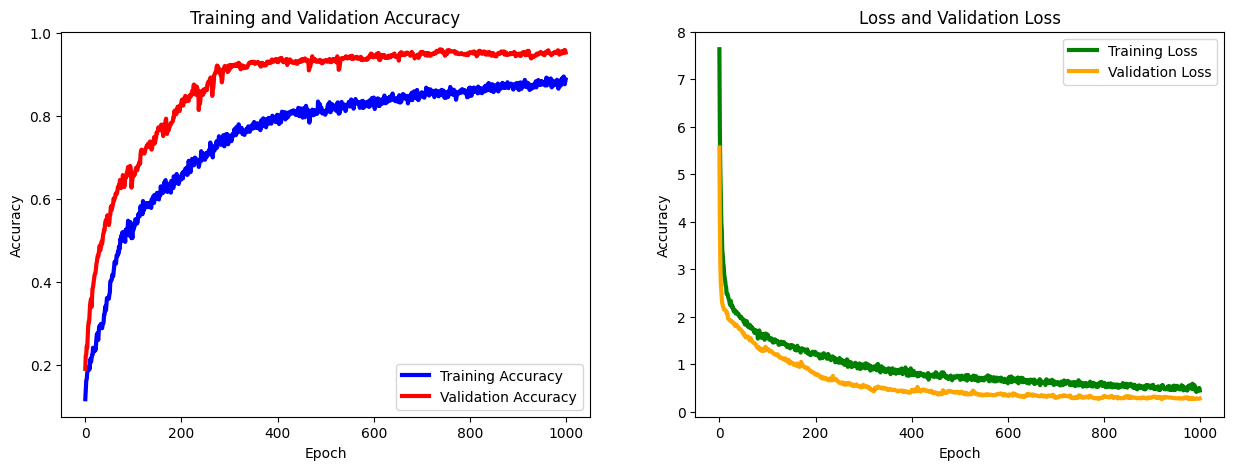

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
num_epochs = model_history.shape[0]
ax[0].plot(np.arange(0, num_epochs), model_history['accuracy'], label='Training Accuracy', lw=3, color='blue')
ax[0].plot(np.arange(0, num_epochs), model_history['val_accuracy'], label='Validation Accuracy', lw=3, color='red')
ax[1].plot(np.arange(0, num_epochs), model_history['loss'], label='Training Loss', lw=3, color='green')
ax[1].plot(np.arange(0, num_epochs), model_history['val_loss'], label='Validation Loss', lw=3, color='orange')
ax[0].set_title('Training and Validation Accuracy')
ax[1].set_title('Loss and Validation Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.show()

In [11]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Loss: 0.4000
Accuracy: 0.9254


# Conclusión <a class="anchor" id="conclusion"></a>
Como podemos observar, existe una gran evolución en la precisión de la red neuronal según van avanzando las épocas, además de observar una disminución de la función de pérdida de forma considerable hasta conseguir una estabilización a partir de las 400 épocas.

Adicionalmente, el modelo es capaz de predecir correctamente el 92,54% de los resultados del dataset de entrenamiento por lo que podemos considerar que se trata de un modelo bastante preciso.